# Wolf, goat and cabbage
The **f**erryman has to transport a **g**oat, a **w**olf and **c**abbage in a boat. The boat is small, so it can hold only one animal, or a cartload of cabbage. 

So he can carry either only the goat, or only the wolf, or only the cabbage. He can also ride in the boat alone. 

He must not leave the wolf and the goat unattended on one bank (the wolf would eat the goat) or the goat and the cabbage (the goat would eat the cabbage). 

He can safely leave the wolf and the cabbage on the bank, because the wolf does not like cabbage.

We can represent the state space.

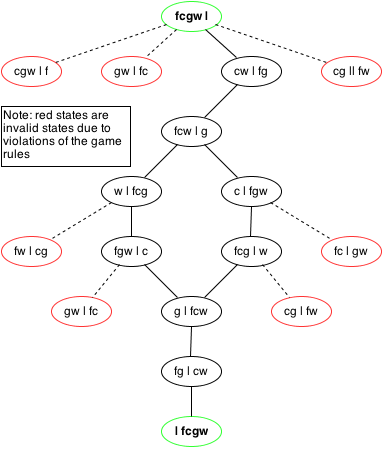


# Task

Solve this logic problem using breadth and depth search (BFS, DFS).

How many trips across the river are needed at least?

- In the previous exercise, you were asked to design a State class to capture the state of the logic problem
- Now implement the Node and Problem classes. You can take inspiration from a simple algorithm.
- Implement depth-first search with constraints (DLS)
- You need to complete the code in the places marked with **# !!! todo**


In [ ]:
import copy

In [ ]:
class State:
    """ 
    
    """

    generated = 0
    
    def __init__(self, left, right):                               
        # !!! todo
        pass
        
    def expand(self, action):
        # !!! todo
        pass               
        

    def __eq__(self, other):  
        # !!! todo       
        pass

In [ ]:
class Node:
    """
        Node for searching
        
        parent - reference to the parent node
        state - the state of the puzzle
        action - the action that led to this node
        depth - tree depth
    """

    def __init__(self, parent=None, state=None, action=None, depth=0):        
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth

    def __eq__(self, other):
        return self.state == other.state
    
    def succesors(self, actions):
        succesors = []

        for action in actions:
            new_state = self.state.expand(action)
            if new_state is not None:
                succesors.append(Node(parent=self,
                                      state=new_state,
                                      action=action,
                                      depth=self.depth + 1))
        return succesors

    def path(self):
        actions = []
        node=self
        while node.action is not None:
            actions.append(node.action)
            node = node.parent        
        actions.reverse()
        return actions

In [ ]:
class Problem:
    """
        Main class
        
        fringe  - list of nodes to scan
        goal    - target state 
        actions - list of possible actions        
    """

    def __init__(self, initial_state, goal, actions):
        self.fringe = []
        self.fringe.append(Node(parent=None, state=initial_state, action=None, depth=0))
        self.goal = goal
        self.actions = actions        

    def goal_test(self, state):
        if self.goal == state:
            return True
        else:
            return False

    def select_from(self, fringe, strategy, max_depth=5):
        if strategy=="BFS":
            return fringe.pop(0)
        elif strategy=="DFS":
            return fringe.pop(-1)
        elif strategy=="DLS":            
            # !!! todo
            pass
        else:
            return fringe.pop(0)
            

    def tree_search(self, strategy, max_depth=5):        
        while True:
            if len(self.fringe) == 0:
                return None

            node = self.select_from(self.fringe, strategy, max_depth)

            if self.goal_test(node.state):
                return node
            
            self.fringe.extend(node.succesors(self.actions))

    def graph_search(self, strategy, max_depth=5):
        explored = []
        while True:
            if len(self.fringe) == 0:
                return None
            
            node = self.select_from(self.fringe, strategy, max_depth)
            
            if self.goal_test(node.state):
                return node
            
            explored.append(node)
            
            succesors = node.succesors(self.actions)

            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# BFS

In [ ]:
problem = Problem(initial_state=State({'F', 'G', 'C', 'W'}, set()),
                goal=State(set(), {'F', 'G', 'C', 'W'}),
                actions=['F', 'FG', 'FW', 'FC'],
                )
State.generated = 0
solution = problem.graph_search(strategy='BFS')
print (f"Number of states searched is {State.generated}.")
if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")

# DFS

In [ ]:
problem = Problem(initial_state=State({'F', 'G', 'C', 'W'}, set()),
                goal=State(set(), {'F', 'G', 'C', 'W'}),
                actions=['F', 'FG', 'FW', 'FC'],
                )
State.generated = 0
solution = problem.graph_search(strategy='DFS', max_depth=25)
print (f"Number of states searched is {State.generated}.")

if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")

# DFS with limits

In [ ]:
problem = Problem(initial_state=State({'F', 'G', 'C', 'W'}, set()),
                goal=State(set(), {'F', 'G', 'C', 'W'}),
                actions=['F', 'FG', 'FW', 'FC'],
                )
State.generated = 0
solution = problem.graph_search(strategy='DLS', max_depth=3)
print (f"Number of states searched is {State.generated}.")

if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")